In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn import metrics
from tensorflow import keras

In [1]:
df = pd.read_csv('../Data/teacher_selected_action_feedback_v2.csv')

NameError: name 'pd' is not defined

In [66]:
df

,assignment_action_id,assignment_log_id,student_user_xid,action_time,action_name,action_name-2,extended_action_name,answer_text,answer_correctness,seconds_since_last_action,teacher_xid,category_name,teacher_feedback
0,3117021,79178,16362,2019-06-28 10:26:45.722-04,AssignmentStartedAction,AssignmentStartedAction,AssignmentStartedAction_,NaN,NaN,NaN,NaN,NaN,NaN
1,3117022,79178,16362,2019-06-28 10:26:45.727-04,ProblemSetStartedAction,ProblemSetStartedAction,ProblemSetStartedAction_,NaN,NaN,0.005,NaN,NaN,NaN
2,3117023,79178,16362,2019-06-28 10:26:45.798-04,ProblemSetStartedAction,ProblemSetStartedAction,ProblemSetStartedAction_,NaN,NaN,0.071,NaN,NaN,NaN
3,3117024,79178,16362,2019-06-28 10:26:45.911-04,ProblemStartedAction,ProblemStartedAction,ProblemStartedAction_false,3. -2x = -12,0.0,0.113,NaN,NaN,NaN
4,3117497,79178,16362,2019-06-28 10:31:01.711-04,StudentResponseAction,StudentResponseAction,StudentResponseAction_true,3/7,1.0,255.800,635.0,Speedy,You are a fast worker!
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344186,362640009,8031173,1690102,2020-10-19 10:05:10.861-04,StudentResponseAction,StudentResponseAction,StudentResponseAction_true,5:6,1.0,12.121,29299.0,Self Correcting,Great job self correcting your answer. This sh...
344187,362640010,8031173,1690102,2020-10-19 10:05:10.867-04,ProblemFinishedAction,ProblemFinishedAction,ProblemFinishedAction_false,2.5,0.0,0.006,NaN,NaN,NaN
344188,362640011,8031173,1690102,2020-10-19 10:05:10.982-04,ProblemSetFinishedAction,ProblemSetFinishedAction,ProblemSetFinishedAction_,NaN,NaN,0.115,NaN,NaN,NaN
344189,362640032,8031173,1690102,2020-10-19 10:05:11.143-04,ProblemSetFinishedAction,ProblemSetFinishedAction,ProblemSetFinishedAction_,NaN,NaN,0.161,NaN,NaN,NaN


In [67]:
df['assignment_log_id'].value_counts()

7314161    249
645430     239
7313467    219
970516     203
6148396    200
          ... 
611044       3
607603       3
607614       3
607678       3
581048       3
Name: assignment_log_id, Length: 7858, dtype: int64

# Preprocessing

## Create label

In [68]:
df['teacher_xid'].notna().astype(int)

0         0
1         0
2         0
3         0
4         1
         ..
344186    1
344187    0
344188    0
344189    0
344190    0
Name: teacher_xid, Length: 344191, dtype: int32

In [69]:
df['label'] = df['teacher_xid'].notna().astype(int)

In [70]:
df

,assignment_action_id,assignment_log_id,student_user_xid,action_time,action_name,action_name-2,extended_action_name,answer_text,answer_correctness,seconds_since_last_action,teacher_xid,category_name,teacher_feedback,label
0,3117021,79178,16362,2019-06-28 10:26:45.722-04,AssignmentStartedAction,AssignmentStartedAction,AssignmentStartedAction_,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3117022,79178,16362,2019-06-28 10:26:45.727-04,ProblemSetStartedAction,ProblemSetStartedAction,ProblemSetStartedAction_,NaN,NaN,0.005,NaN,NaN,NaN,0
2,3117023,79178,16362,2019-06-28 10:26:45.798-04,ProblemSetStartedAction,ProblemSetStartedAction,ProblemSetStartedAction_,NaN,NaN,0.071,NaN,NaN,NaN,0
3,3117024,79178,16362,2019-06-28 10:26:45.911-04,ProblemStartedAction,ProblemStartedAction,ProblemStartedAction_false,3. -2x = -12,0.0,0.113,NaN,NaN,NaN,0
4,3117497,79178,16362,2019-06-28 10:31:01.711-04,StudentResponseAction,StudentResponseAction,StudentResponseAction_true,3/7,1.0,255.800,635.0,Speedy,You are a fast worker!,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344186,362640009,8031173,1690102,2020-10-19 10:05:10.861-04,StudentResponseAction,StudentResponseAction,StudentResponseAction_true,5:6,1.0,12.121,29299.0,Self Correcting,Great job self correcting your answer. This sh...,1
344187,362640010,8031173,1690102,2020-10-19 10:05:10.867-04,ProblemFinishedAction,ProblemFinishedAction,ProblemFinishedAction_false,2.5,0.0,0.006,NaN,NaN,NaN,0
344188,362640011,8031173,1690102,2020-10-19 10:05:10.982-04,ProblemSetFinishedAction,ProblemSetFinishedAction,ProblemSetFinishedAction_,NaN,NaN,0.115,NaN,NaN,NaN,0
344189,362640032,8031173,1690102,2020-10-19 10:05:11.143-04,ProblemSetFinishedAction,ProblemSetFinishedAction,ProblemSetFinishedAction_,NaN,NaN,0.161,NaN,NaN,NaN,0


## Process 'seconds_since_last_action'

In [71]:
df['seconds_since_last_action'] = df['seconds_since_last_action'].fillna(0)

<AxesSubplot:xlabel='action_name', ylabel='seconds_since_last_action'>

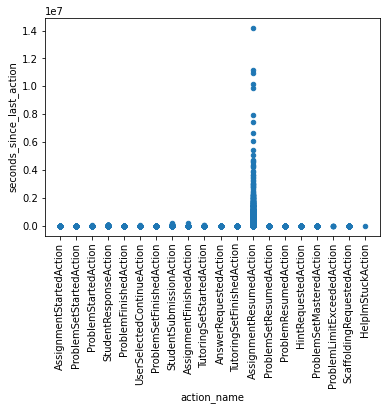

In [72]:
df[['action_name', 'seconds_since_last_action']].plot.scatter(x='action_name', y='seconds_since_last_action', rot=90)

In [73]:
df['seconds_since_last_action'].sort_values(ascending=False)

11390     1.418422e+07
67869     1.113593e+07
71766     1.096190e+07
53443     1.013662e+07
14686     9.852720e+06
              ...     
150282    0.000000e+00
150291    0.000000e+00
36877     0.000000e+00
150342    0.000000e+00
0         0.000000e+00
Name: seconds_since_last_action, Length: 344191, dtype: float64

In [74]:
df.iloc[11390]

assignment_action_id                           45675607
assignment_log_id                                206244
student_user_xid                                  71592
action_time                  2020-02-27 17:31:21.686-05
action_name                     AssignmentResumedAction
action_name-2                   AssignmentResumedAction
extended_action_name           AssignmentResumedAction_
answer_text                                         NaN
answer_correctness                                  NaN
seconds_since_last_action                  14184220.126
teacher_xid                                         NaN
category_name                                       NaN
teacher_feedback                                    NaN
label                                                 0
Name: 11390, dtype: object

In [75]:
# Whenever assignment is resumed set seconds_since_last_action to 0
# TODO: MinMaxScaler on seconds_since_last_action?

# df[['action_name', 'seconds_since_last_action']]
df.loc[df.action_name == "AssignmentResumedAction", "seconds_since_last_action"] = 0

<AxesSubplot:xlabel='action_name', ylabel='seconds_since_last_action'>

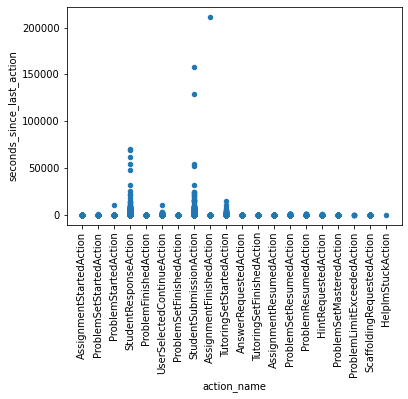

In [76]:
df[['action_name', 'seconds_since_last_action']].plot.scatter(x='action_name', y='seconds_since_last_action', rot=90)

In [77]:
data_subset = df[['seconds_since_last_action', 'label']]

In [78]:
data_subset

,seconds_since_last_action,label
0,0.000,0
1,0.005,0
2,0.071,0
3,0.113,0
4,255.800,1
...,...,...
344186,12.121,1
344187,0.006,0
344188,0.115,0
344189,0.161,0


In [79]:
pd.get_dummies(df['extended_action_name'])

,AnswerRequestedAction_,AssignmentFinishedAction_,AssignmentResumedAction_,AssignmentStartedAction_,HelpImStuckAction_,HintRequestedAction_false,HintRequestedAction_true,ProblemFinishedAction_,ProblemFinishedAction_false,ProblemFinishedAction_true,...,ProblemStartedAction_false,ProblemStartedAction_true,ScaffoldingRequestedAction_,StudentResponseAction_false,StudentResponseAction_true,StudentSubmissionAction_false,StudentSubmissionAction_true,TutoringSetFinishedAction_,TutoringSetStartedAction_,UserSelectedContinueAction_
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
344187,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
344188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
pd.concat([pd.get_dummies(df['extended_action_name']), data_subset], axis=1)

,AnswerRequestedAction_,AssignmentFinishedAction_,AssignmentResumedAction_,AssignmentStartedAction_,HelpImStuckAction_,HintRequestedAction_false,HintRequestedAction_true,ProblemFinishedAction_,ProblemFinishedAction_false,ProblemFinishedAction_true,...,ScaffoldingRequestedAction_,StudentResponseAction_false,StudentResponseAction_true,StudentSubmissionAction_false,StudentSubmissionAction_true,TutoringSetFinishedAction_,TutoringSetStartedAction_,UserSelectedContinueAction_,seconds_since_last_action,label
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.005,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.071,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.113,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,255.800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344186,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,12.121,1
344187,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.006,0
344188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.115,0
344189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.161,0


## TODO: Stratification

In [81]:
unique_students = df.student_user_xid.unique()
np.random.shuffle(unique_students)

In [82]:
students_tenfold = np.array_split(unique_students, 10)

In [83]:
# # fold data 0-7 for train and 8-9 for test (or maybe just do cross validation?)
# train_ids = students_tenfold[0:8]

In [84]:
# test_ids = students_tenfold[8:]

In [85]:
def holdout_split(holdout, df):
    test = df[df.student_user_xid.isin(students_tenfold[holdout])]
    
    train = students_tenfold[:holdout] + students_tenfold[holdout+1:]
    train = [val for sublist in train for val in sublist]
    train = df[df.student_user_xid.isin(train)]
    
    return (test, train)

## grouping timeseries by the assignment_log_id

In [86]:
def create_xy(df):
#     data_subset = df[['seconds_since_last_action', 'label']]
#     inputdf = pd.concat([df['assignment_log_id'], pd.get_dummies(df['extended_action_name']), data_subset], axis=1)
    groupeddf = df.groupby('assignment_log_id').agg(lambda x: x.tolist())
    del groupeddf['student_user_xid']
    
    X = groupeddf.iloc[:,:-1].to_numpy()
    y = groupeddf.iloc[:, -1:].to_numpy()
    
    XT = [np.array([np.array(xii) for xii in xi]).reshape((28,-1)).T for xi in X]
    yt = [np.array([np.array(yii) for yii in yi]).reshape((1,-1)).T for yi in y]
    
    return (XT, yt)

## Create and run lstm

In [87]:
n_units = 50
n_epochs = 5 # TODO: Use parameter for early stopping instead
batch_size = 50
val_split = 0.2

inputs = keras.Input(shape=(None,28), dtype="float32")
lstm_model = keras.Sequential([
#     keras.Input(shape=(1,None,28), dtype="float32"),
    keras.layers.LSTM(n_units, input_shape=(None, 28), return_sequences=True), # 249 is the largest sequence
#     keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [100]:
# Notes: binary cross entropy loss function, optimization: adam or adagrad
lstm_model.compile(
  loss='binary_crossentropy',
  optimizer='adam'
)

data_subset = df[['seconds_since_last_action', 'label']]
inputdf = pd.concat([df[['assignment_log_id', 'student_user_xid']], pd.get_dummies(df['extended_action_name']), data_subset], axis=1)
# Call model.fit 10 times and output predictions and actual values (calculate metrics later: auc, kappa, recall)
# Call model.predict passing in test
X_train_predict, X_test_predict = [], []
X_train, Y_train = [None for i in range(10)], [None for i in range(10)]
X_test, Y_test = [None for i in range(10)], [None for i in range(10)]

for i in range(0, 10):
    test, train = holdout_split(i, inputdf)
    X_train[i], Y_train[i] = create_xy(train)
    X_test[i], Y_test[i] = create_xy(test) # TODO: Save this along with the predictions. Maybe do this in a loop first and run a separate loop for lstm.fit

for i in range(0, 10):
#     test, train = holdout_split(i, inputdf)
#     X_train, Y_train = create_xy(train)
#     X_test, Y_test = create_xy(test) # TODO: Save this along with the predictions. Maybe do this in a loop first and run a separate loop for lstm.fit
    
    lstm_model.fit(
        tf.keras.preprocessing.sequence.pad_sequences(X_train[i], padding='post'), # TODO: Does this need to get padded to 249?
        tf.keras.preprocessing.sequence.pad_sequences(Y_train[i], padding='post'),
        epochs=n_epochs,
        batch_size=batch_size,
        validation_split=val_split
    )

#     X_train_predict.append(lstm_model.predict(tf.keras.preprocessing.sequence.pad_sequences(X_train)))
    X_test_predict.append(lstm_model.predict(tf.keras.preprocessing.sequence.pad_sequences(X_test[i])))

Epoch 1/5
115/115 [==============================] - 27s 185ms/step - loss: 0.0245 - val_loss: 0.0435
Epoch 2/5
115/115 [==============================] - 20s 170ms/step - loss: 0.0241 - val_loss: 0.0430
Epoch 3/5
115/115 [==============================] - 20s 174ms/step - loss: 0.0238 - val_loss: 0.0431
Epoch 4/5
115/115 [==============================] - 20s 171ms/step - loss: 0.0233 - val_loss: 0.0431
Epoch 5/5
115/115 [==============================] - 18s 154ms/step - loss: 0.0239 - val_loss: 0.0435
Epoch 1/5
111/111 [==============================] - 21s 168ms/step - loss: 0.0253 - val_loss: 0.0468
Epoch 2/5
111/111 [==============================] - 16s 147ms/step - loss: 0.0252 - val_loss: 0.0479
Epoch 3/5
111/111 [==============================] - 19s 171ms/step - loss: 0.0252 - val_loss: 0.0481
Epoch 4/5
111/111 [==============================] - 19s 169ms/step - loss: 0.0252 - val_loss: 0.0478
Epoch 5/5
111/111 [==============================] - 20s 178ms/step - loss: 0.0251

In [ ]:
# Un-pad
def remove_padding(Y, predict):
    unpadded = 
    for i in range(len(Y)):
        for seq in Y[i]:
            print(len(seq))
        print()

In [193]:
Y_flattened = []
for i in range(10):
    print("Base length:", len(Y_test[i]))
    Y_test_flat = np.array([])
    for seq in Y_test[i]:
        Y_test_flat = np.append(Y_test_flat,seq.ravel())
#     Y_flattened.append(Y_test_flat.reshape((-1,1)))
    Y_flattened.append(Y_test_flat)
    print("Flattened length:", len(Y_test_flat.reshape((-1,1))))
    print("First sequence:", len(Y_test_flat.reshape((-1,1))) / len(Y_test[i]))
    print("First length:", len(Y_test[i][0]))
    print()

Base length: 701
Flattened length: 30316
First sequence: 43.24679029957204
First length: 28

Base length: 961
Flattened length: 41073
First sequence: 42.73985431841832
First length: 9

Base length: 838
Flattened length: 38907
First sequence: 46.42840095465394
First length: 8

Base length: 660
Flattened length: 32580
First sequence: 49.36363636363637
First length: 45

Base length: 804
Flattened length: 36489
First sequence: 45.384328358208954
First length: 7

Base length: 717
Flattened length: 29601
First sequence: 41.28451882845188
First length: 7

Base length: 705
Flattened length: 29024
First sequence: 41.168794326241134
First length: 7

Base length: 627
Flattened length: 26295
First sequence: 41.9377990430622
First length: 7

Base length: 856
Flattened length: 37875
First sequence: 44.24649532710281
First length: 7

Base length: 989
Flattened length: 42031
First sequence: 42.49848331648129
First length: 7



In [183]:
# Flatten and remove post padding
for i in range(10):
    print("Base length:", len(X_test_predict[i]))
    predict_test_flat = np.array([])
    for seq in X_test_predict[i]:
        predict_test_flat = np.append(predict_test_flat, seq.ravel())
    predict_test_flat.reshape((-1,1))
    print("Flattened length:", len(predict_test_flat.reshape((-1,1))))
    print("Per sequence:", len(predict_test_flat.reshape((-1,1))) / len(X_test_predict[i]))
    print("First length:", len(X_test_predict[i][0]))
    print()

Base length: 701
Flattened length: 153519
Per sequence: 219.0
First length: 219

Base length: 961
Flattened length: 239289
Per sequence: 249.0
First length: 249

Base length: 838
Flattened length: 150840
Per sequence: 180.0
First length: 180

Base length: 660
Flattened length: 157740
Per sequence: 239.0
First length: 239

Base length: 804
Flattened length: 155172
Per sequence: 193.0
First length: 193

Base length: 717
Flattened length: 129060
Per sequence: 180.0
First length: 180

Base length: 705
Flattened length: 115620
Per sequence: 164.0
First length: 164

Base length: 627
Flattened length: 103455
Per sequence: 165.0
First length: 165

Base length: 856
Flattened length: 151512
Per sequence: 177.0
First length: 177

Base length: 989
Flattened length: 189888
Per sequence: 192.0
First length: 192



In [175]:
predict_unpadded = []
for i in range(len(Y_test)):
    predict = np.array([])
    for j in range(len(Y_test[i])):
        unpadded_length = len(Y_test[i][j])
        predict = np.append(predict, X_test_predict[i][j][:unpadded_length])
    predict_unpadded.append(predict)

In [199]:
len(Y_flattened[0]), len(predict_unpadded[0])

(30316, 30316)

In [182]:
len(X_test_predict[0][0])

219

In [214]:
# auc, kappa
# auc doesn't have rounding. to do kappa use 0.5 as your rounding. Otherwise use mean/median of training set
for i in range(10):
    fpr, tpr, thresholds = metrics.roc_curve(Y_flattened[i], predict_unpadded[i])
    print('Test Score: %.2f AUC' % (metrics.auc(fpr, tpr)))

Test Score: 0.59 AUC
Test Score: 0.62 AUC
Test Score: 0.57 AUC
Test Score: 0.61 AUC
Test Score: 0.57 AUC
Test Score: 0.58 AUC
Test Score: 0.57 AUC
Test Score: 0.59 AUC
Test Score: 0.59 AUC
Test Score: 0.62 AUC


In [ ]:
metrics.cohen_kappa_score(Y_flattened[0], predict_unpadded[0])

In [212]:
from collections import Counter
Counter(Y_flattened[0]) 

Counter({0.0: 27723, 1.0: 2593})

In [126]:
len(X_test_predict[0])

701

In [44]:
for arr in Y_test:
    print(arr.shape)

(45, 1)
(7, 1)
(7, 1)
(8, 1)
(7, 1)
(13, 1)
(7, 1)
(7, 1)
(7, 1)
(7, 1)
(10, 1)
(37, 1)
(31, 1)
(50, 1)
(32, 1)
(44, 1)
(15, 1)
(22, 1)
(21, 1)
(21, 1)
(21, 1)
(46, 1)
(39, 1)
(50, 1)
(38, 1)
(56, 1)
(12, 1)
(55, 1)
(15, 1)
(16, 1)
(19, 1)
(15, 1)
(18, 1)
(15, 1)
(82, 1)
(26, 1)
(49, 1)
(61, 1)
(53, 1)
(46, 1)
(88, 1)
(28, 1)
(49, 1)
(27, 1)
(22, 1)
(100, 1)
(88, 1)
(95, 1)
(146, 1)
(10, 1)
(17, 1)
(9, 1)
(72, 1)
(59, 1)
(60, 1)
(51, 1)
(12, 1)
(21, 1)
(11, 1)
(79, 1)
(58, 1)
(55, 1)
(53, 1)
(53, 1)
(57, 1)
(42, 1)
(54, 1)
(37, 1)
(31, 1)
(100, 1)
(93, 1)
(25, 1)
(21, 1)
(100, 1)
(21, 1)
(72, 1)
(69, 1)
(89, 1)
(36, 1)
(17, 1)
(39, 1)
(42, 1)
(13, 1)
(74, 1)
(93, 1)
(68, 1)
(67, 1)
(76, 1)
(67, 1)
(126, 1)
(30, 1)
(26, 1)
(95, 1)
(51, 1)
(53, 1)
(48, 1)
(49, 1)
(46, 1)
(36, 1)
(102, 1)
(69, 1)
(30, 1)
(98, 1)
(22, 1)
(95, 1)
(7, 1)
(10, 1)
(75, 1)
(36, 1)
(104, 1)
(93, 1)
(93, 1)
(19, 1)
(13, 1)
(17, 1)
(22, 1)
(17, 1)
(29, 1)
(8, 1)
(11, 1)
(164, 1)
(105, 1)
(113, 1)
(90, 1)
(15, 1)
(

In [45]:
len(Y_test)

837

In [52]:
Y_test_flat = np.array([])
for seq in Y_test:
    Y_test_flat = np.append(Y_test_flat,seq.ravel())
Y_test_flat.reshape((-1,1))

# X_test_flat = np.array([]).reshape((-1,1))
# Y_test_flat = np.array([]).reshape((-1,1))
# for seq in X_PRED:
# 		X_test_flat = np.append(X_test_flat,seq.ravel().reshape((-1,1)),axis=0)
# 	X_test_flat.reshape((-1,1))

# 	for seq in Y_test:
# 		Y_test_flat = np.append(Y_test_flat,seq.ravel().reshape((-1,1)),axis=0)
# 	Y_test_flat.reshape((-1,1))


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [53]:
Y_test_flat.shape

(36294,)

In [62]:
X_test_predict[2].shape

(861, 219, 1)

In [205]:
# build a detector for one teacher, one category
# pick something more behavioral and not knowledge-based (not mastery but perseverance, too fast). Not a lot of people focus on positive behaviors. Use something that's kind of universal

# Anomaly detection could be used as a feature

# Use the hidden layer of the lstm as an embedding - use it for every timestep - apply k-means clustering to figure out actions that are similar to each other (temporal clustering)
# Would be a way to relate teacher categories to each other